# Exploratory Data Analysis on Laptop Price Dataset

### Importing all the necessary libraries

In [3]:
# Importing all the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
path = r"C:\Users\dasal\Downloads\laptopPrice.csv"
df = pd.read_csv(path)
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


# Perform basic quality checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [7]:
df.shape

(823, 19)

In [8]:
# check for missing values
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [9]:
# check for duplicated data(row wise duplication)
df.duplicated().sum()

21

In [10]:
# To drop duplicates
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

# Handled duplicated data

## Data cleaning using automated pipelines =>
    categorical : mode
    continuous : mean/median

In [14]:
cat = list(df.columns[df.dtypes=="object"])
con = list(df.columns[df.dtypes!="object"])

In [15]:
print(cat)

['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


In [16]:
print(con)

['Price', 'Number of Ratings', 'Number of Reviews']


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'))

In [19]:
con_pipe = make_pipeline(SimpleImputer(strategy="mean"))

In [20]:
clean_data = ColumnTransformer([
    ("cat",cat_pipe,cat),
    ("con",con_pipe,con)
]).set_output(transform="pandas")

In [21]:
clean_data

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['brand', 'processor_brand', 'processor_name',
                                  'processor_gnrtn', 'ram_gb', 'ram_type',
                                  'ssd', 'hdd', 'os', 'os_bit',
                                  'graphic_card_gb', 'weight', 'warranty',
                                  'Touchscreen', 'msoffice', 'rating']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['Price', 'Number of Ratings',
                                  'Number of Reviews'])])

In [22]:
df_clean = clean_data.fit_transform(df)

# Update the column names

In [24]:
df_clean.columns

Index(['cat__brand', 'cat__processor_brand', 'cat__processor_name',
       'cat__processor_gnrtn', 'cat__ram_gb', 'cat__ram_type', 'cat__ssd',
       'cat__hdd', 'cat__os', 'cat__os_bit', 'cat__graphic_card_gb',
       'cat__weight', 'cat__warranty', 'cat__Touchscreen', 'cat__msoffice',
       'cat__rating', 'con__Price', 'con__Number of Ratings',
       'con__Number of Reviews'],
      dtype='object')

In [25]:
cols = []
for i in df_clean:
    #print(i)
    a = i.split("__")
    #print(a)
    cols.append(a[-1])

In [26]:
cols

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating',
 'Price',
 'Number of Ratings',
 'Number of Reviews']

In [27]:
df_clean.columns = cols

In [28]:
df_clean.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating', 'Price',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [29]:
df_clean.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Price,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,2 stars,34649.0,3.0,0.0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,38999.0,65.0,5.0
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,39999.0,8.0,1.0
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,3 stars,69990.0,0.0,0.0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars,26990.0,0.0,0.0


# statistical Analysis

In [31]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

In [32]:
cat1 = list(df_clean.columns[df_clean.dtypes=="object"])
con1 = list(df_clean.columns[df_clean.dtypes!="object"])

In [33]:
df.describe().T
# by default, df returns the statstics features for continous data 

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


In [34]:
df_clean[cat1].describe().T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


In [35]:
df["brand"].mode()[0]

'ASUS'

# Key points from above analysis:
    More than 50% of data corresponds to Windows OS,64-bit os_bit ..
    ..
    ..
    provide in detail analysis from above points

# Descriptive Analysis


## Univariate Analysis


In [39]:
print(cat1)

['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


In [40]:
df_clean.shape

(802, 19)

In [41]:
df_clean['brand'].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

<Axes: xlabel='brand'>

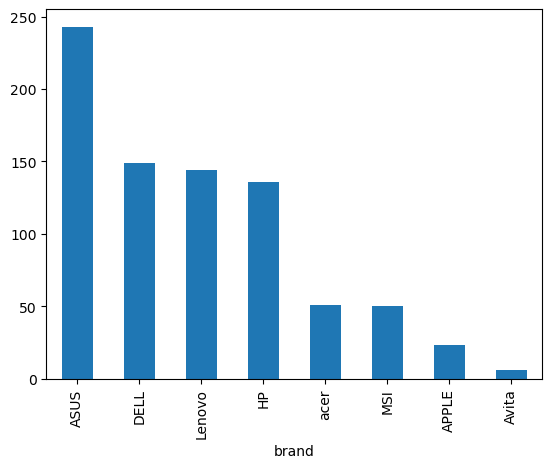

In [74]:
# column chart
df_clean['brand'].value_counts().plot(kind="bar")

<Axes: ylabel='brand'>

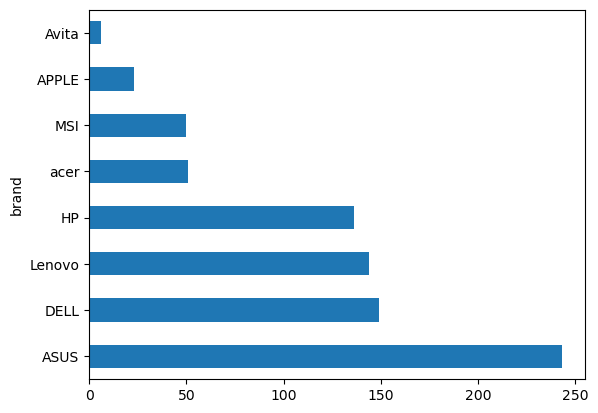

In [76]:
df_clean["brand"].value_counts().plot(kind="barh")

<Axes: ylabel='count'>

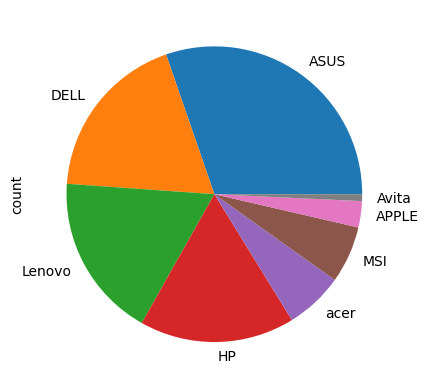

In [84]:
df_clean["brand"].value_counts().plot(kind="pie")

<Axes: xlabel='brand', ylabel='count'>

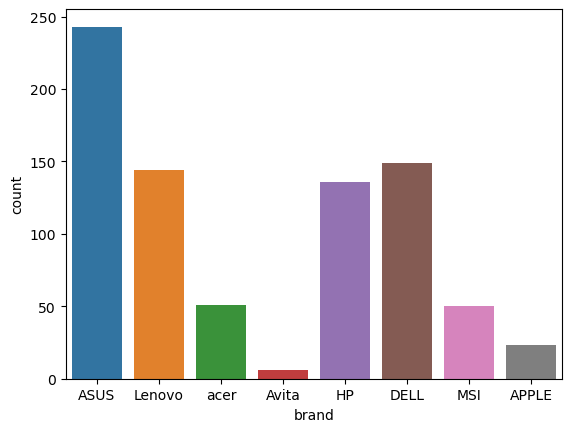

In [86]:
sns.countplot(data=df_clean,x="brand",hue="brand")

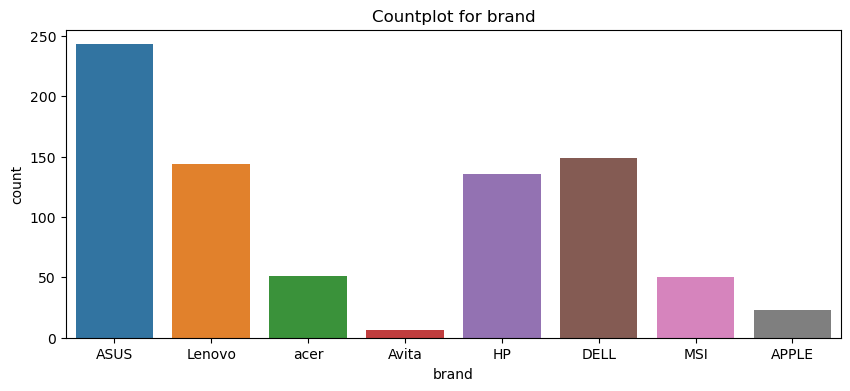

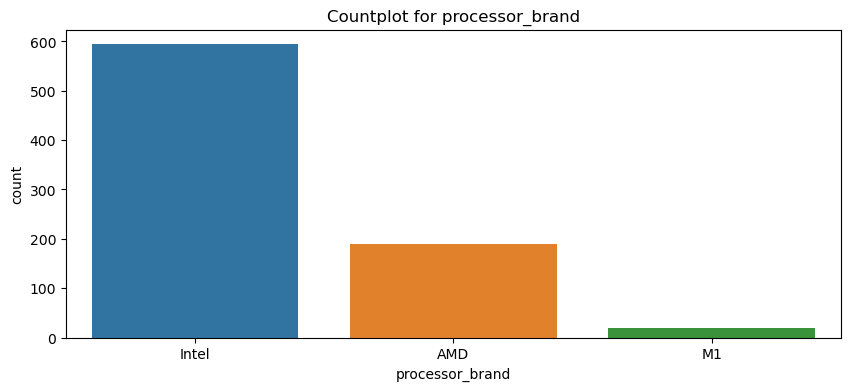

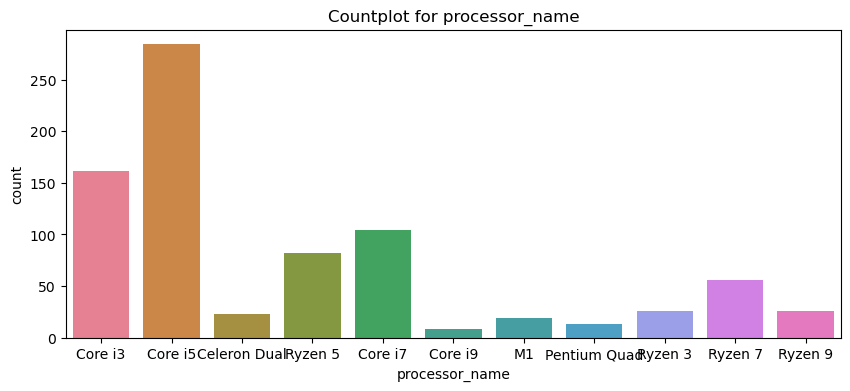

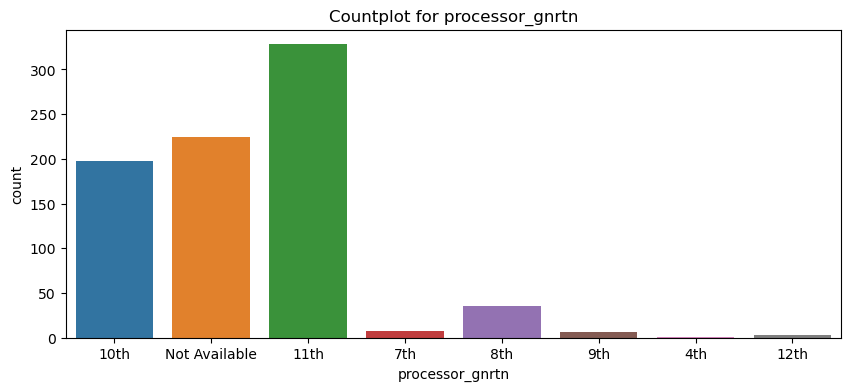

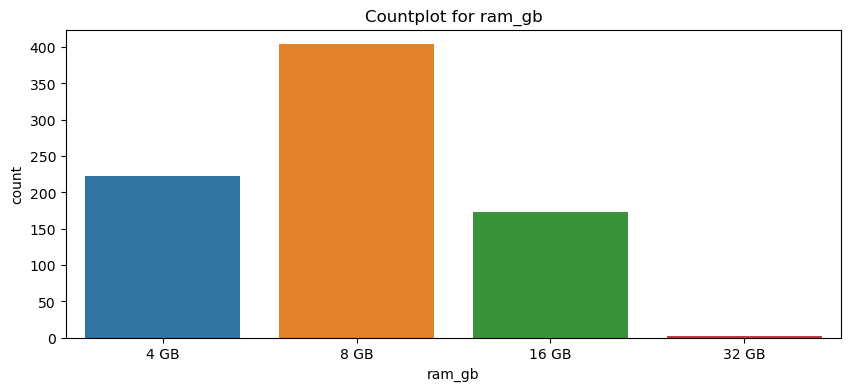

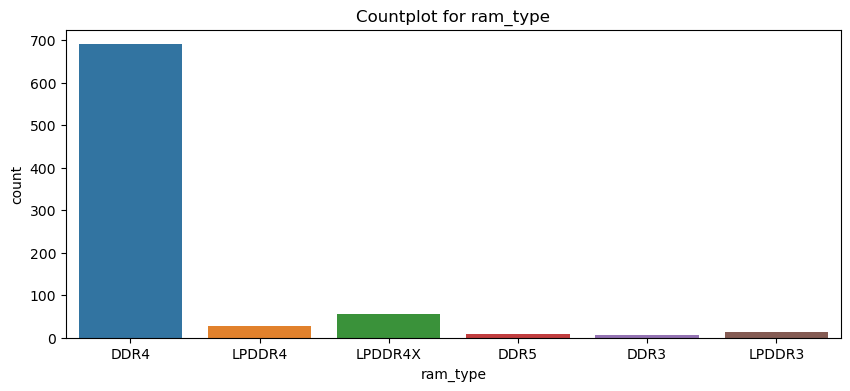

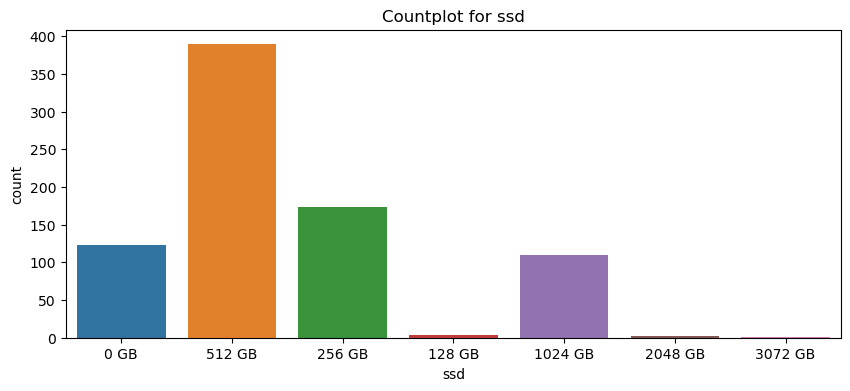

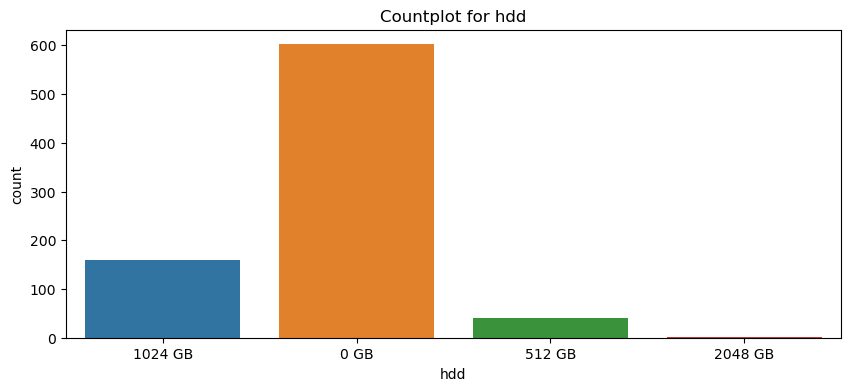

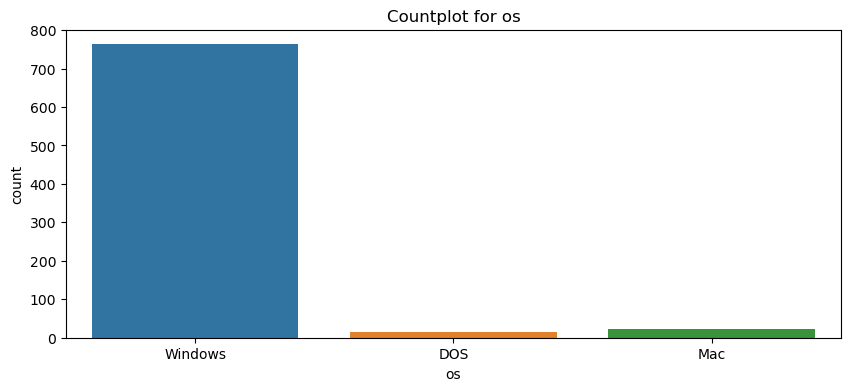

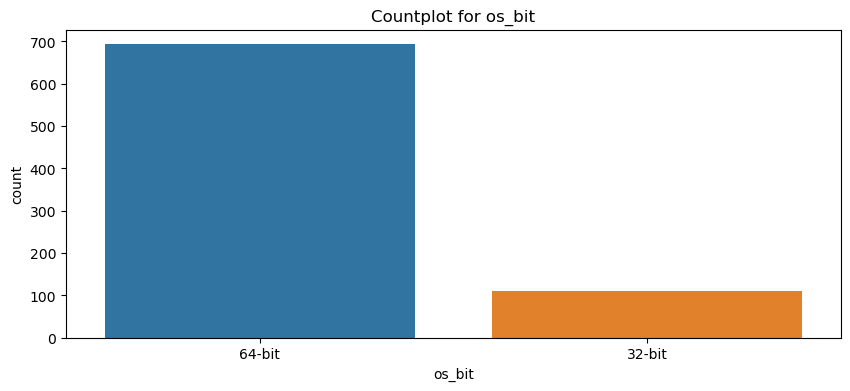

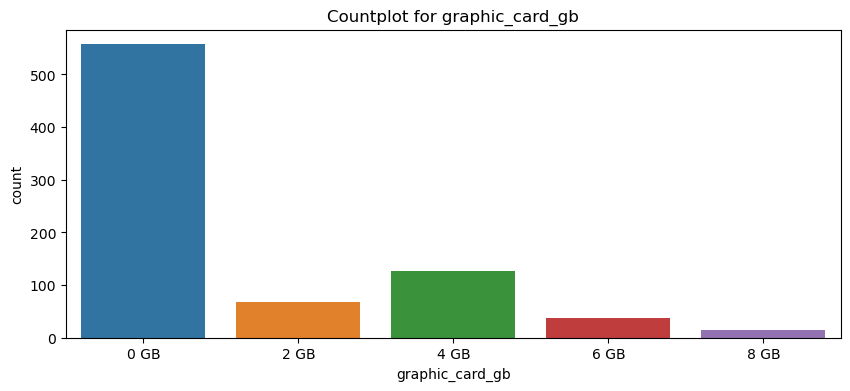

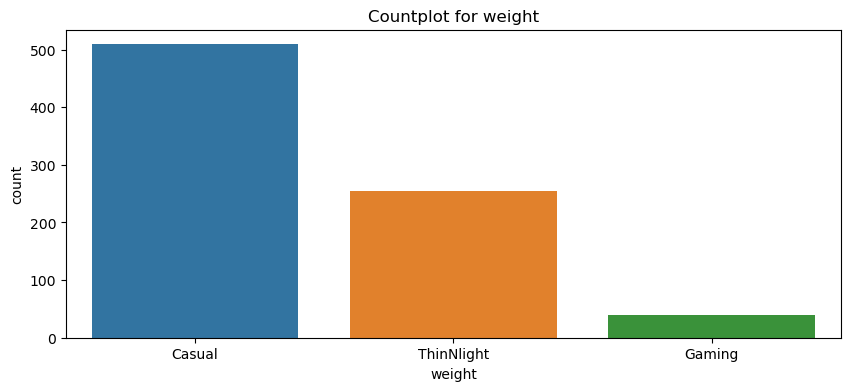

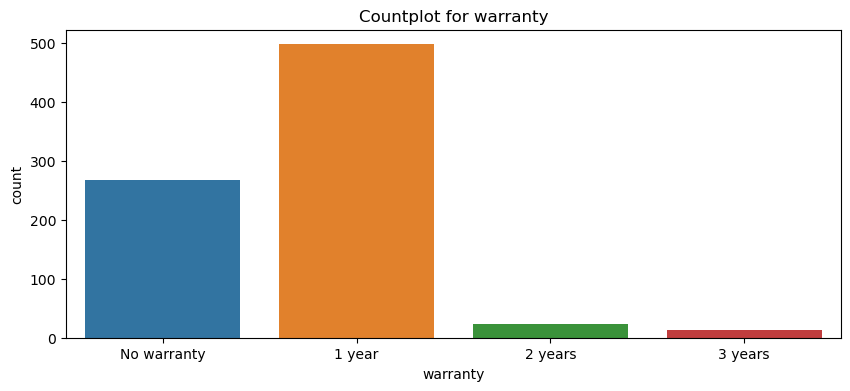

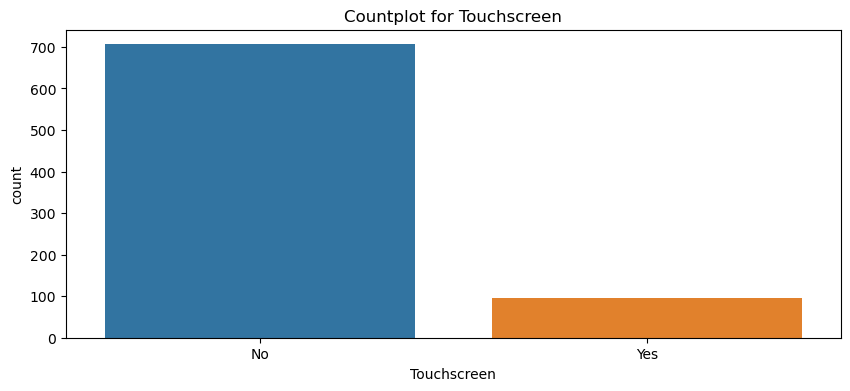

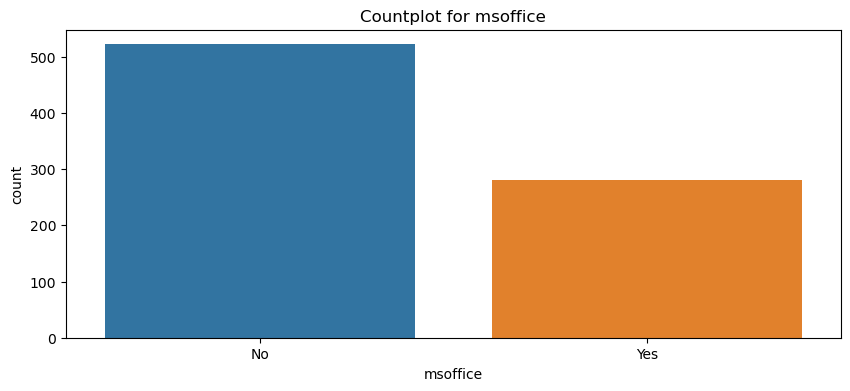

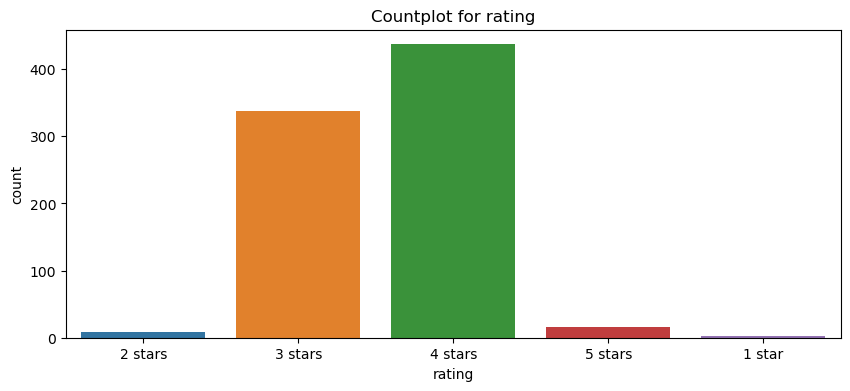

In [88]:
for i in cat1:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df_clean,x=i,hue=i)
    plt.title(f"Countplot for {i}")
    plt.show()

# Histogram

In [91]:
con1

['Price', 'Number of Ratings', 'Number of Reviews']

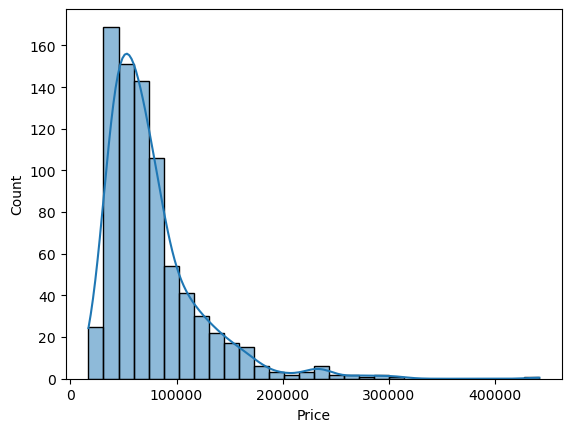

In [97]:
sns.histplot(data=df_clean,x="Price",kde=True,bins=30) # kde=True gives you bell curve
plt.show()

In [101]:
import numpy as np

In [105]:
df_clean["Price"] = np.log10(df_clean["Price"])

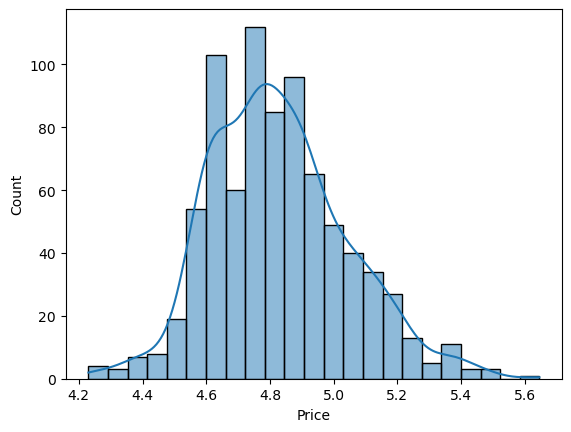

In [107]:
sns.histplot(data=df_clean,x="Price",kde=True) # kde=True gives you bell curve
plt.show()

In [109]:
df_clean["Price"]

0      4.539691
1      4.591053
2      4.602049
3      4.845036
4      4.431203
         ...   
818    5.133507
819    5.161338
820    5.176062
821    5.155306
822    4.759592
Name: Price, Length: 802, dtype: float64

<Axes: xlabel='Number of Ratings', ylabel='Count'>

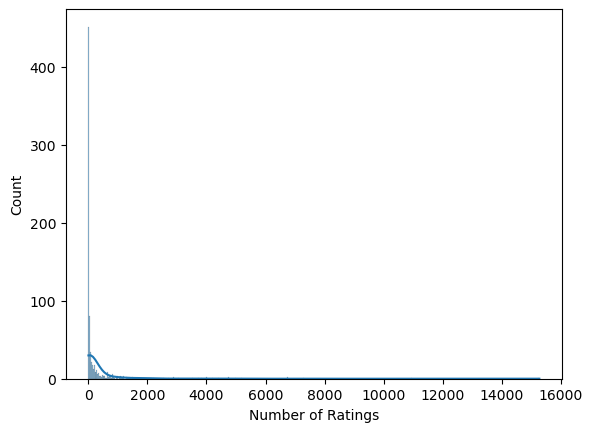

In [111]:
sns.histplot(data=df_clean,x="Number of Ratings",kde=True)

<Axes: xlabel='Number of Reviews', ylabel='Count'>

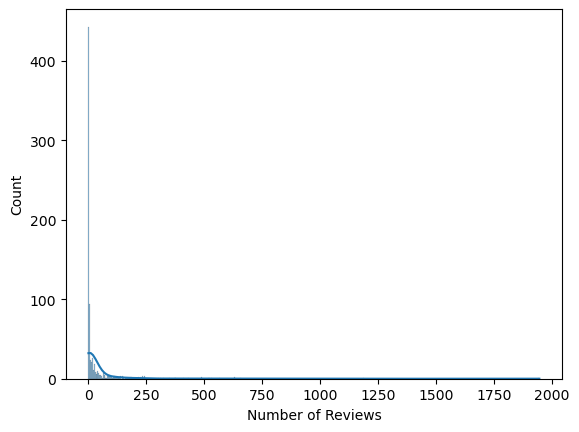

In [113]:
sns.histplot(data=df_clean,x="Number of Reviews",kde=True)

# Insights for above univariate analysis
    Around 40-45% of data doesnt contain ratings and reviews from the user Price range of most of the laptops are between 35k-90k


<Axes: xlabel='processor_brand', ylabel='count'>

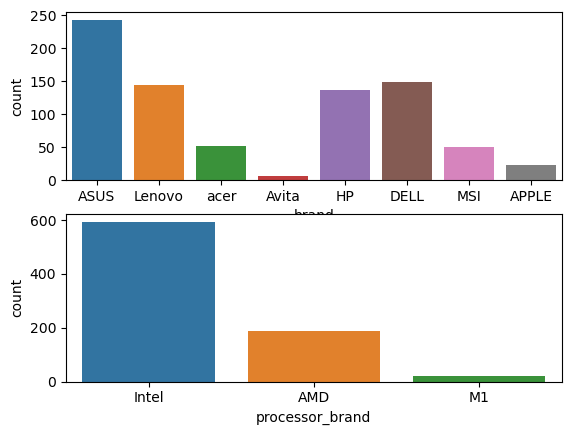

In [117]:
fig,axs = plt.subplots(2)
sns.countplot(data=df_clean,x="brand",ax=axs[0],hue="brand")
sns.countplot(data=df_clean,x="processor_brand",ax=axs[1],hue="processor_brand")

In [119]:
print(cat1)

['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


<Axes: xlabel='os_bit', ylabel='count'>

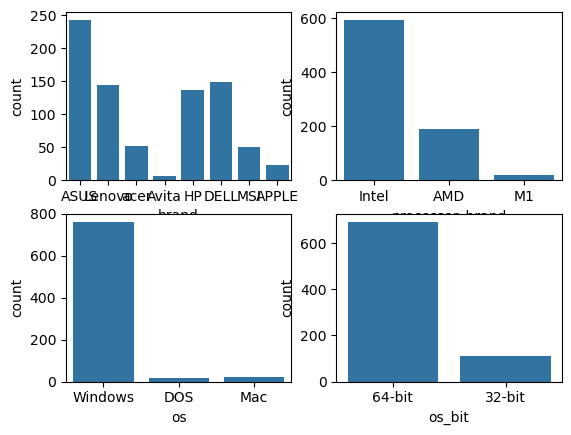

<Figure size 600x600 with 0 Axes>

In [121]:
fig,axs = plt.subplots(2,2)
plt.figure(figsize=(6,6))
sns.countplot(data=df_clean,x="brand",ax=axs[0,0])
sns.countplot(data=df_clean,x="processor_brand",ax=axs[0,1])
sns.countplot(data=df_clean,x="os",ax=axs[1,0])
sns.countplot(data=df_clean,x="os_bit",ax=axs[1,1])

# Multivariate Analysis


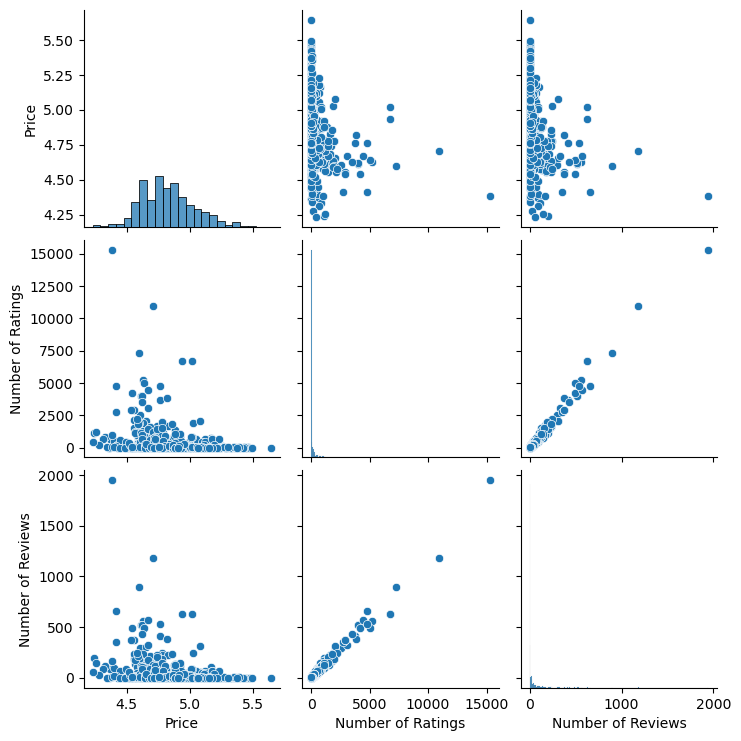

In [126]:
sns.pairplot(df_clean[con1])